## 연비 찾기
- 데이터셋: auto-mpg.csv
- 목적 : 연비 예측
- 학습방법 : 지도학습 > 회귀
- 알고리즘 : LinearRegression

[1] 모듈준비

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

[2] 데이터 준비


In [2]:
file_path = r'C:\Users\KDP15\Desktop\KDT6\머신러닝\DATA\auto_mpg (1).csv'

In [3]:
mpgDF=pd.read_csv(file_path)

In [4]:
mpgDF.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
mpgDF['kpl']=mpgDF['mpg']*0.425144

In [6]:

mpgDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
 9   kpl           398 non-null    float64
dtypes: float64(4), int64(4), object(2)
memory usage: 31.2+ KB


In [7]:
# 중복데이터 확인
mpgDF.duplicated().sum() 

0

In [8]:

mpgDF['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [9]:
mpgDF['horsepower']=mpgDF['horsepower'].replace('?',np.nan)

In [10]:
mpgDF2=mpgDF.dropna().copy()

In [11]:
mpgDF2['horsepower']=mpgDF2['horsepower'].astype('int64')

In [12]:
mpgDF2.drop(['car name', 'origin', 'mpg'],axis=1,inplace=True)

In [13]:
mpgDF2

,cylinders,displacement,horsepower,weight,acceleration,model year,kpl
0,8,307.0,130,3504,12.0,70,7.652592
1,8,350.0,165,3693,11.5,70,6.377160
2,8,318.0,150,3436,11.0,70,7.652592
3,8,304.0,150,3433,12.0,70,6.802304
4,8,302.0,140,3449,10.5,70,7.227448
...,...,...,...,...,...,...,...
393,4,140.0,86,2790,15.6,82,11.478888
394,4,97.0,52,2130,24.6,82,18.706336
395,4,135.0,84,2295,11.6,82,13.604608
396,4,120.0,79,2625,18.6,82,11.904032


In [14]:
mpgDF2.columns[0]

'cylinders'

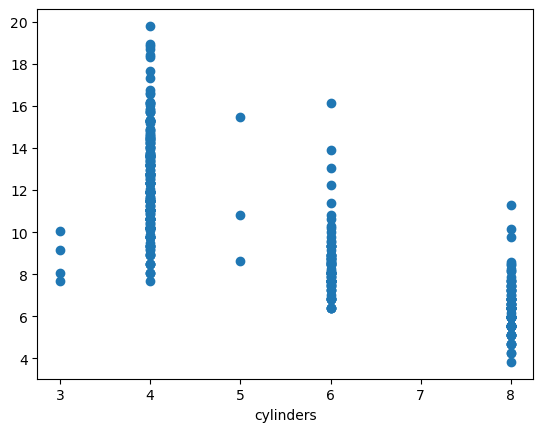

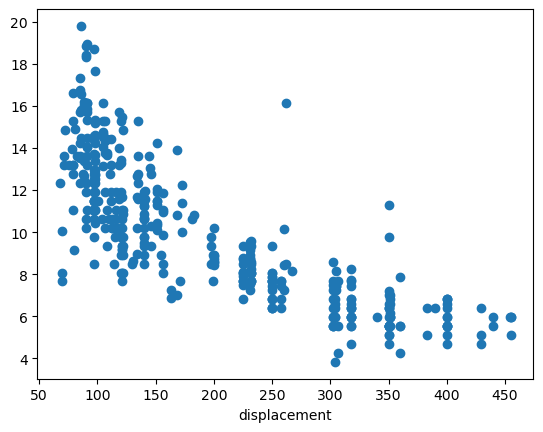

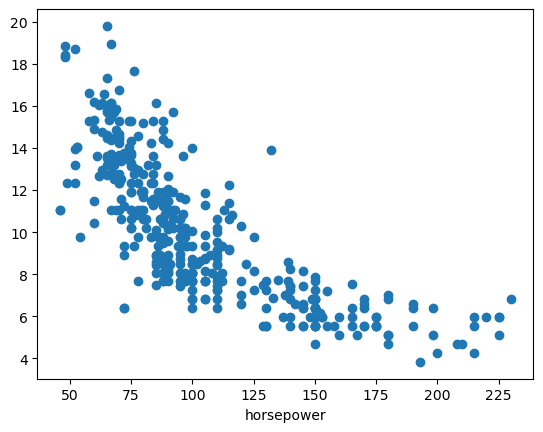

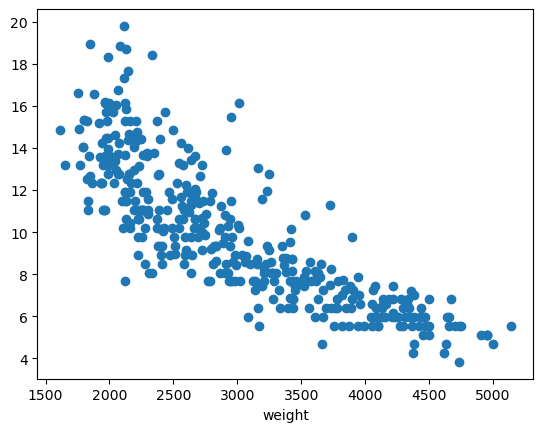

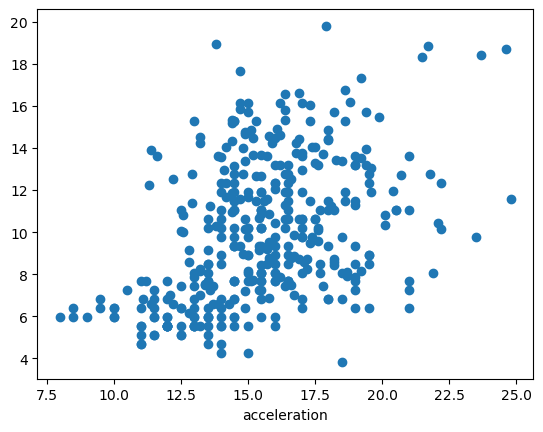

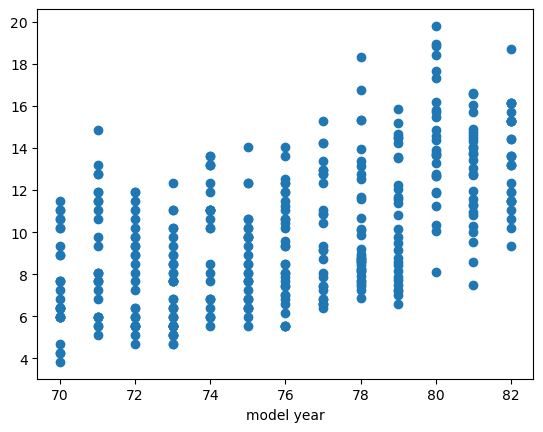

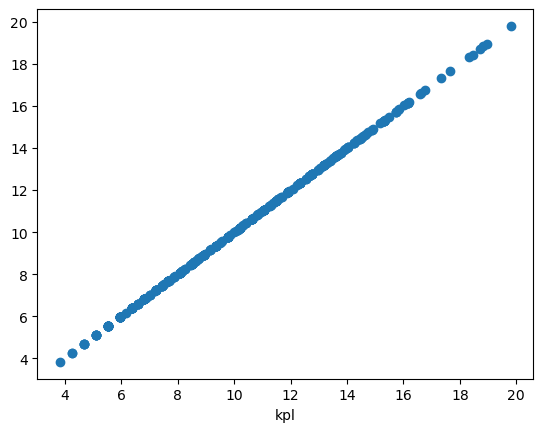

In [15]:
for i in mpgDF2.columns:
    plt.scatter(mpgDF2[i],mpgDF2['kpl'])
    plt.xlabel(i)
    plt.show()

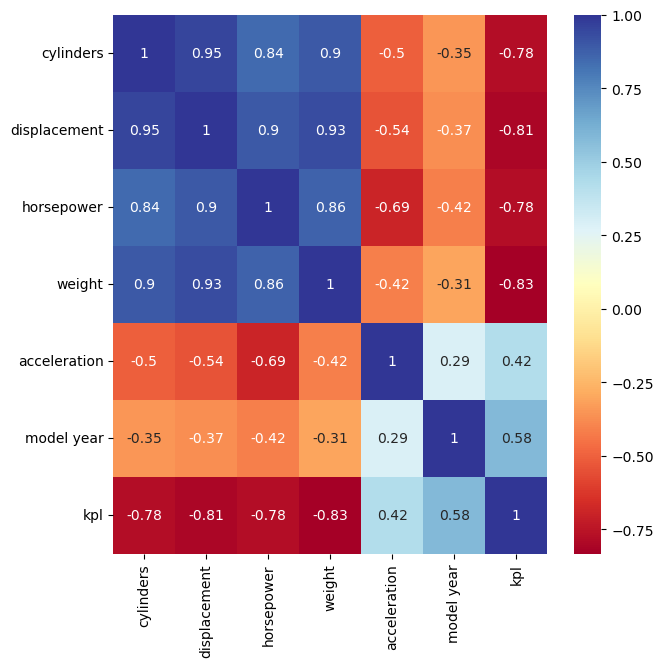

In [16]:
plt.figure(figsize=(7,7))
g = sns.heatmap(mpgDF2.corr(), annot=True, cmap='RdYlBu')

[3] 학습준비

In [17]:
features=mpgDF2[['displacement','weight','horsepower', 'cylinders']]
target=mpgDF2['kpl']

print(f'features : {features.shape}, {features.ndim}D')
print(f'target : {target.shape}, {target.ndim}D')

features : (392, 4), 2D
target : (392,), 1D


[3-2] 학습용 & 테스트용 데이터셋 분리
- 전체 데이터셋 => 학습용 테스트용 80:20
- 회귀 데이터셋 => 데이터셋 구성 요소에 대한 비율 고려 X

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# train:test = 80:20 ==> test_size = 0.2 또는 train_size = 0.8
# stratify 매개변수 : 분류일 경우 사용, 분류 타겟의 종류에 대한 비율 고려
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)

In [20]:
# train:test = 80:20 체크
print(f'X_train : {X_train.shape}, {X_train.ndim}D')
print(f'y_train : {y_train.shape}, {y_train.ndim}D')
print(f'X_test : {X_test.shape}, {X_test.ndim}D')
print(f'y_test : {y_test.shape}, {y_test.ndim}D')

X_train : (313, 4), 2D
y_train : (313,), 1D
X_test : (79, 4), 2D
y_test : (79,), 1D


In [21]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

피쳐 스케일링

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
# 스케일러 인스턴스 생성
mmScaler=MinMaxScaler()

In [24]:
# MinMaxScaler에 데이터셋 전용에 속성값 설정
mmScaler.fit(X_train)

MinMaxScaler()

In [25]:
# 학습용, 테스트용 데이터셋 스케일링 진행
# 학습용 데이터 ==> 스케일링 ==> ndarray 타입 반환
X_train_scaled=mmScaler.transform(X_train)
X_train_scaled.shape, X_train_scaled.min(), X_train_scaled.max()

((313, 4), 0.0, 1.0)

In [26]:
# 테스트용 데이터 ==> 스케일링  ==> ndarray 타입 반환
X_test_scaled= mmScaler.transform(X_test)
X_test_scaled.shape, X_test_scaled.min(), X_test_scaled.max()

((79, 4), 0.0, 1.0553560742070616)

[3] 모델 생성

In [27]:
model = LinearRegression()

In [28]:
model.fit(X_train_scaled, y_train)

LinearRegression()

[4]모델 성능평가

In [29]:
model.score(X_test_scaled, y_test)

0.7082784079898486

In [30]:
# 테스트 데이터로 예측
y_pred = model.predict(X_test_scaled)

# 모델의 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'mse : {mse}')
print(f'r2 : {r2}') 


mse : 3.2350825301589756
r2 : 0.7082784079898486


In [31]:
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [32]:
df_results

,Actual,Predicted
0,9.140596,10.763096
1,12.329176,11.664182
2,10.160942,8.874625
3,14.922554,13.790540
4,7.440020,6.472968
...,...,...
74,14.539925,12.626369
75,8.077736,10.257693
76,6.802304,9.432759
77,6.164588,6.001709


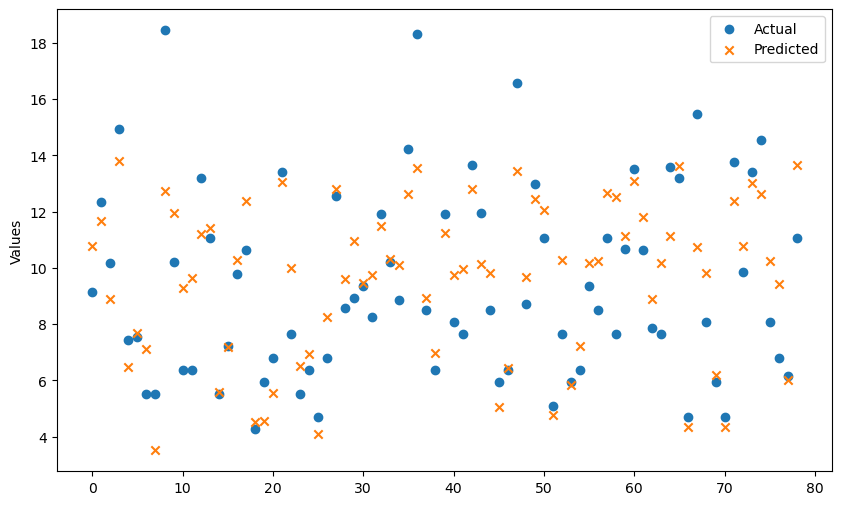

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(df_results.index, df_results['Actual'], label='Actual', marker='o')
plt.scatter(df_results.index, df_results['Predicted'], label='Predicted', marker='x')
plt.ylabel('Values')
plt.legend()
plt.show()

In [34]:
#features=mpgDF2[['displacement','weight']]
#target=mpgDF2['kpl']

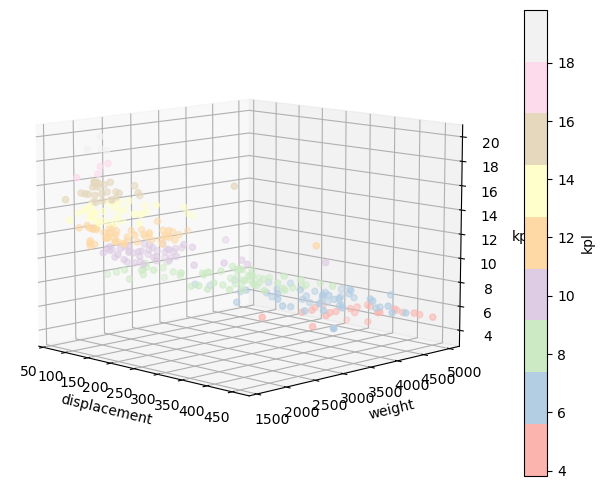

In [35]:
# 3차원 그래프 그리기

x = X_train['displacement']
y = X_train['weight']
z = y_train
c = y_train
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(x, y, z, c=c, cmap='Pastel1')

# Rotate the axes

ax.view_init(elev=10, azim=-45)  
ax.set_xlabel('displacement')
ax.set_ylabel('weight')
ax.set_zlabel('kpl')

# Add a color bar
cbar = plt.colorbar(sc)
cbar.set_label('kpl',fontsize = 10)  

plt.tight_layout()
plt.show()